<a href="https://colab.research.google.com/github/chiyanglin-AStar/2025_physics_note/blob/main/02_fluid_mechanics_landau_ch1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

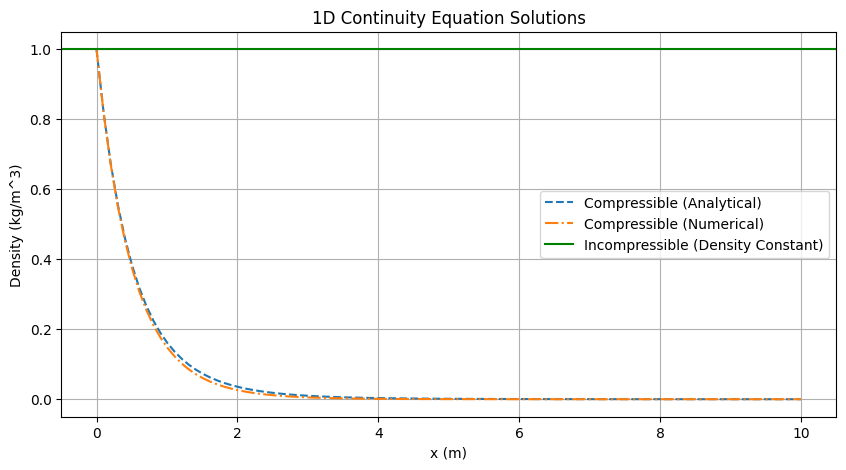

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
x = np.linspace(0, 10, 100)  # Spatial domain (0 to 10 meters)
rho0 = 1.0  # Initial density (kg/m^3)
v0 = 2.0    # Velocity (m/s)

# Compressible Flow: Analytical Solution (Assume A(x) = 1 + 0.1 * x)
def compressible_flow(x, rho):
    A = 1 + 0.1 * x  # Varying cross-sectional area
    return -v0 * rho / A

rho_compressible = rho0 * np.exp(-v0 * x / (1 + 0.1 * x))  # Analytical solution

# Incompressible Flow: Velocity should remain constant
v_incompressible = np.full_like(x, v0)  # Velocity constant

# Numerical Solution: Compressible Flow using solve_ivp
def continuity_equation(t, rho, A):
    return -v0 * rho / A(t)

A_func = lambda x: 1 + 0.1 * x  # Cross-sectional area function
sol = solve_ivp(continuity_equation, [x[0], x[-1]], [rho0], t_eval=x, args=(A_func,))

# Plotting the results
plt.figure(figsize=(10, 5))

# Compressible
plt.plot(x, rho_compressible, label="Compressible (Analytical)", linestyle='--')
plt.plot(sol.t, sol.y[0], label="Compressible (Numerical)", linestyle='-.')

# Incompressible
plt.axhline(rho0, color='green', linestyle='-', label="Incompressible (Density Constant)")

plt.title("1D Continuity Equation Solutions")
plt.xlabel("x (m)")
plt.ylabel("Density (kg/m^3)")
plt.legend()
plt.grid()
plt.show()